# Kmeans, Decision Trees and Naive Bayes
Concept practice


## Kmeans

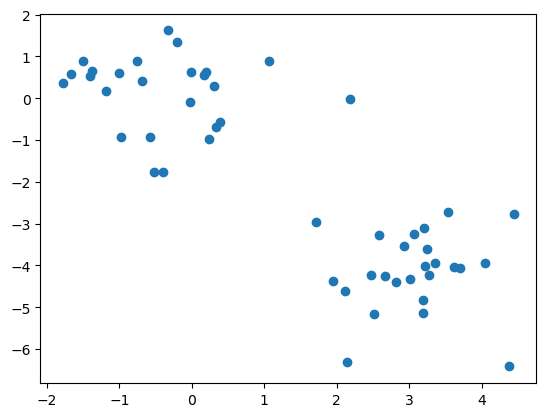

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

arr = np.round(np.random.randn(50,2), 2)
arr[0:25, 0] = arr[0:25, 0] + 3
arr[0:25, 1] = arr[0:25,1]  - 4

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(arr[:, 0], arr[:, 1])
plt.show()

labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


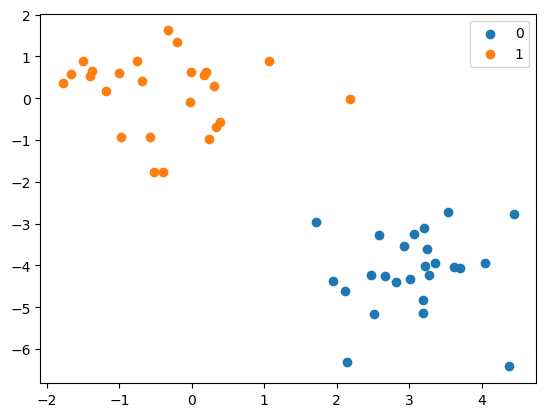

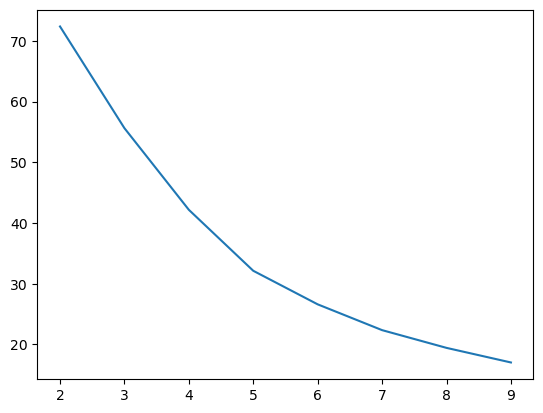

In [2]:
from sklearn.cluster import KMeans

#kmean
kmeans = KMeans(n_clusters=2)
label = kmeans.fit_predict(arr)
print('labels: ', label)
#visualize clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(arr[label == i , 0] , arr[label == i , 1] , label = i)
plt.legend()
plt.show()

# elbow plot
sse = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(arr)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 10), sse)
plt.show()

labels_complete:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
labels_average:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
labels_single:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


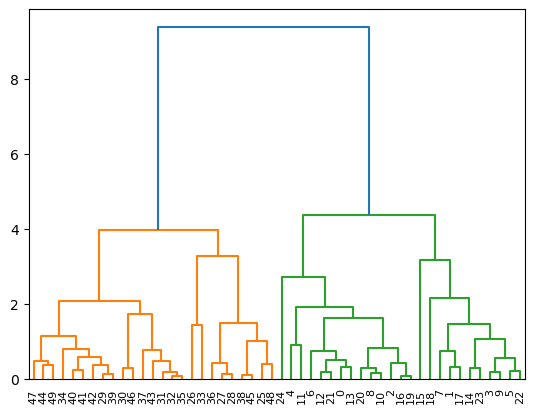

In [3]:
#Hierarchical
from sklearn.cluster import AgglomerativeClustering as ac
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(arr, method='complete'))
#complete
model_complete = ac(n_clusters=2, affinity='euclidean', linkage='complete')
model_complete.fit(arr)
labels_complete = model_complete.labels_
#avg
model_average = ac(n_clusters=2, affinity='euclidean', linkage='average')
model_average.fit(arr)
labels_average = model_average.labels_
#single
model_single = ac(n_clusters=2, affinity='euclidean', linkage='single')
model_single.fit(arr)
labels_single = model_single.labels_

print('labels_complete: ', labels_complete)
print('labels_average: ', labels_average)
print('labels_single: ', labels_single)

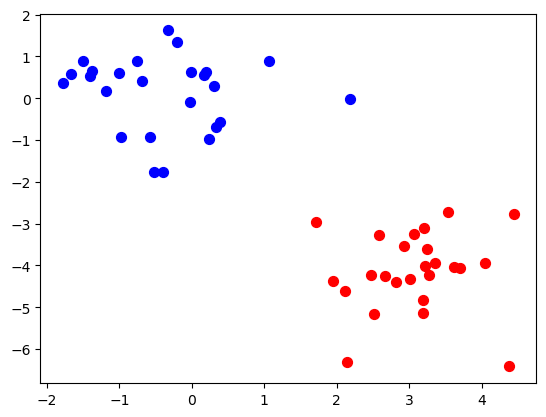

{'kmean': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1]), 'h_complete': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64), 'h_avg': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64), 'h_single': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)}


In [4]:
import pandas as pd
#cluster plot for complete
plt.scatter(arr[labels_complete==0, 0], arr[labels_complete==0, 1], s=50, marker='o', color='red')
plt.scatter(arr[labels_complete==1, 0], arr[labels_complete==1, 1], s=50, marker='o', color='blue')
plt.show()

#compare kmean and hierarchical
data = {
    "kmean": label,
    "h_complete": labels_complete,
    "h_avg": labels_average,
    "h_single": labels_single
}
df = pd.DataFrame(data)
print(data)

#complete matches with kmeans

             sepalwidth  petallength  petalwidth        class
sepallength                                                  
5.1                 3.5          1.4         0.2  Iris-setosa
4.9                 3.0          1.4         0.2  Iris-setosa
4.7                 3.2          1.3         0.2  Iris-setosa
4.6                 3.1          1.5         0.2  Iris-setosa
5.0                 3.6          1.4         0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
Float64Index: 150 entries, 5.1 to 5.9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalwidth   150 non-null    float64
 1   petallength  150 non-null    float64
 2   petalwidth   150 non-null    float64
 3   class        150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 5.9+ KB
None
(150, 4)


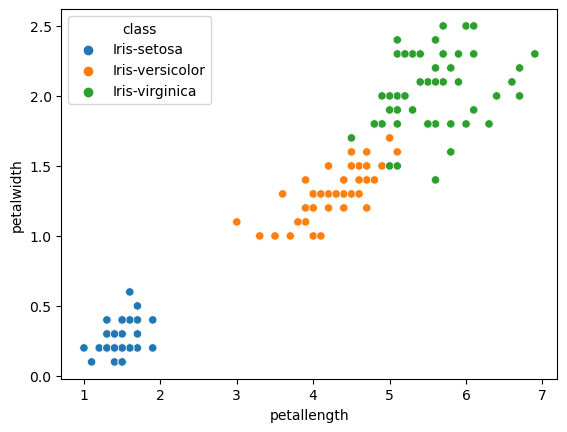

In [5]:
#with actual iris data
import seaborn as sns

iris = pd.read_csv('iris_csv.csv', index_col=0)
print(iris.head())
print(iris.info())
print(iris.shape)

sns.scatterplot(data=iris, x='petallength', y='petalwidth', hue='class')
#since we can see 3 cluster here i will go ahead with these 2 as features

iris_sub = iris[['petallength', 'petalwidth']]



In [6]:
#kmean
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(iris_sub)
print('labels: ', label)

#h_complete
model_complete = ac(n_clusters=3, affinity='euclidean', linkage='complete')
model_complete.fit(iris_sub)
labels_complete = model_complete.labels_
print(labels_complete)

#add prediction to df
iris['kmean_pred'] = label
iris['h_complete_pred'] = labels_complete

print(iris)

labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
             sepalwidth  petallength  petalwidth           class  kmean_pred  \
sepallength                                                                    
5.1                 3.5          1.4         0.2     Iris-setosa           0   
4.9                 3.0          1.4         0.2     Iris-setosa           0   
4.7                 3.2          1.3         0.2     Iris-s

#### Limitations of the above methods:
1) Difficulty in choosing the optimal number of clusters.
2) Not very good with outliers as they get clustered with wrong groups
3) Does not do well with many dimentions
4) since it works with distance based clustering, they are computational infficient.

## Decision Trees 



We will use a subset of the diabetes data set provided by the UCI machine learning repository: https://archive.ics.uci.edu/ml/datasets/diabetes


In [7]:
# Load the data set
df=pd.read_csv("diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Select features

x = df.drop(['Outcome'], axis=1)
y = df.Outcome

In [141]:

print(df.corr())
# based on correlation w outcome my initial features: Glucose, BMI, Age  with Glucose at the root 

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [8]:


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model = DecisionTreeClassifier()
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [15]:

print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.76      0.77      0.76        99
           1       0.57      0.56      0.57        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154

Accuracy: 69.48051948051948


array([[76, 23],
       [24, 31]], dtype=int64)

#### Visualizing Decision Trees


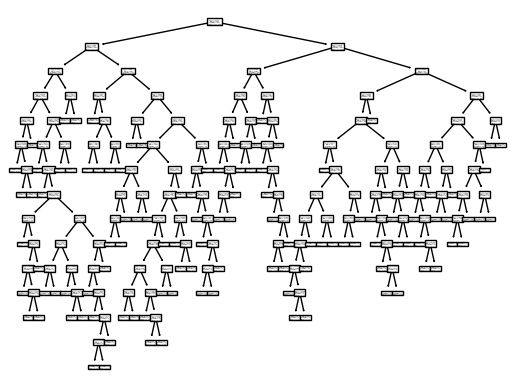

In [98]:
# Put your answer here
tree.plot_tree(model);

In [17]:
# mehtod 1: feature selection

importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# based on that selecting: Glucose, BMI, BloodPressure, Age

x_train_sub = x_train[['Glucose','BMI','BloodPressure','Age']]
x_test_sub = x_test[['Glucose','BMI','BloodPressure','Age']]

model1 = DecisionTreeClassifier()
model1 = model1.fit(x_train_sub,y_train)
y_pred = model1.predict(x_test_sub)

print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))

#accuracy increased to 72.0% prediction rate also improved

Feature: 0, Score: 0.07043
Feature: 1, Score: 0.27909
Feature: 2, Score: 0.09571
Feature: 3, Score: 0.05557
Feature: 4, Score: 0.03278
Feature: 5, Score: 0.19735
Feature: 6, Score: 0.13074
Feature: 7, Score: 0.13833
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        99
           1       0.58      0.64      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154

Accuracy: 70.77922077922078
[[74 25]
 [20 35]]


In [133]:
# mehtod 2: feature selection + depth limit
# features: Glucose, BMI, BloodPressure, Age; depth:9

model2 = DecisionTreeClassifier(max_depth=9)
model2 = model2.fit(x_train_sub,y_train)
y_pred = model2.predict(x_test_sub)
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))

#accuracy increased to 76.6% prediction rate also improved. TS and TF count has also increased by a small number.

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Accuracy: 76.62337662337663
[[79 20]
 [16 39]]


In [140]:
# mehtod 3: Random Forests
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators = 100)  #n_estimators - number of trees
model3 = model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))

#accuracy increased to 82.4% prediction rate improved further. TS count has also increased.

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        99
           1       0.78      0.71      0.74        55

    accuracy                           0.82       154
   macro avg       0.81      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154

Accuracy: 82.46753246753246
[[88 11]
 [16 39]]


## Naive Bayes

In [44]:
fake_train = pd.read_csv('fake-news/train.csv')

fake_train.info()
fake_train.shape
print(fake_train.head())
fake_train.dropna(inplace=True)
fake_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [59]:
x = fake_train[['title','text']]
y = fake_train['label']

#the title and text are features which might contain words that might help decide if it is unreliable.
#author because some authors are not reliable.

#I will use title and text in my model

In [68]:
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

# define preprocessing steps for each feature
preprocessor1 = TfidfVectorizer()
preprocessor2 = TfidfVectorizer()

# define the column transformer to apply the preprocessing steps to each feature
preprocessor = ColumnTransformer(transformers=[
    ('text', preprocessor1, 'text'),
    ('title', preprocessor2, 'title')
])

# define the pipeline with the preprocessor and the classifier
pipeline = make_pipeline(preprocessor, MultinomialNB())

# use 5 fold cross-validation to evaluate the model's performance
scores = cross_val_score(pipeline, x, y, cv=5)

print(scores.mean())
print(scores.std())


0.7965545529122232
0.008555039517970564


In [70]:
print('Accuracy:', scores.mean()*100)

Accuracy: 79.65545529122232


In [73]:
fake_test = pd.read_csv('fake-news/test.csv')
fake_test.dropna(inplace=True)

# Extract the text feature
x_test = fake_test[['title','text']]

# Make predictions on the test data using the trained pipeline
pipeline.fit(x, y)
predictions = pipeline.predict(x_test)

print(predictions)

[0 0 0 ... 0 0 0]


In [109]:
label = pd.DataFrame({'label': predictions})
print(fake_test['id'].shape)
print(label.shape)

result = pd.concat([fake_test['id'], label], axis=1)
  
result.to_csv('to_submit.csv', index=False)


(4575,)
(4575, 1)
